- **@author**: run_walker
- **@references**:
    1. [mlxtend.plotting.plot_learning_curves](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/)

- `mlxtend.plotting.plot_learning_curves`: 函数文档中说其仅能对分类器使用。另外采用的是留置法，而不是交叉验证
- 借助`sklearn.model_selection.learning_curve`计算结果，通过`matplotlib`自己实现可视化 <font color="red">[推荐]</font>

In [8]:
from mlxtend.plotting import plot_learning_curves

?plot_learning_curves

Signature:
plot_learning_curves(
    X_train,
    y_train,
    X_test,
    y_test,
    clf,
    train_marker='o',
    test_marker='^',
    scoring='misclassification error',
    suppress_plot=False,
    print_model=True,
    style='fivethirtyeight',
    legend_loc='best',
)
Docstring:
Plots learning curves of a classifier.

Parameters
----------
X_train : array-like, shape = [n_samples, n_features]
    Feature matrix of the training dataset.
y_train : array-like, shape = [n_samples]
    True class labels of the training dataset.
X_test : array-like, shape = [n_samples, n_features]
    Feature matrix of the test dataset.
y_test : array-like, shape = [n_samples]
    True class labels of the test dataset.
clf : Classifier object. Must have a .predict .fit method.
train_marker : str (default: 'o')
    Marker for the training set line plot.
test_marker : str (default: '^')
    Marker for the test set line plot.
scoring : str (default: 'misclassification error')
    If not 'misclassification

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

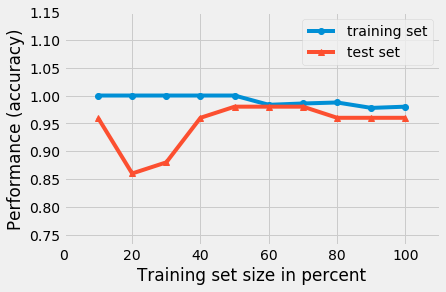

In [45]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test, clf, 
                     print_model=False, scoring='accuracy');

In [48]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
    
    
def plot_learning_curve(model, X, y, scoring, train_sizes=None, cv=5, 
                        alpha=0.2, legend=True, grid=True):
    if train_sizes is None:
        train_sizes = np.linspace(0.05, 1, 50)
    N_train, val_train, val_test = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv,
        scoring=scoring)
    
    def _plot_with_err(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, 
                         edgecolor='none', 
                         facecolor=lines[0].get_color(), 
                         alpha=alpha)

    _plot_with_err(N_train, val_train, label='train')
    _plot_with_err(N_train, val_test, label='validation')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring)
    if legend:
        plt.legend()
    plt.grid(grid);

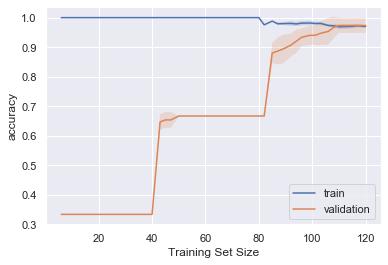

In [49]:
plot_learning_curve(clf, X, y, scoring='accuracy')

In [50]:
# roc_auc doesn't support multiclass format
# plot_learning_curve(clf, X, y, scoring='roc_auc') 